In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer 
from gensim.models import KeyedVectors
import os
import string
import re
import pprint
from urllib.request import urlopen
import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 133kB 5.4MB/s 
--2020-12-16 20:29:21--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.106.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.106.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  17.1MB/s    in 96s     

2020-12-16 20:30:57 (16.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



# Import Data & Data Cleaning

In [ ]:
listings_Oct_2020 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/data/listings.csv.gz', compression='gzip')
review_Oct_2020 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/data/reviews.csv.gz', compression='gzip')
display(listings_Oct_2020.head())
display(review_Oct_2020.head())
print(listings_Oct_2020.shape)
print(review_Oct_2020.shape)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,207,2020-10-25,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",$75.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,30,60,335,2020-10-10,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,NaN,1 private bath,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dish

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...


(30533, 74)
(1075393, 6)


In [ ]:
review_Sep_2020 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-09-09/data/reviews.csv.gz', compression='gzip')
listings_Sep_2020 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-09-09/data/listings.csv.gz', compression='gzip')
display(review_Sep_2020.head())
display(listings_Sep_2020.head())
print(listings_Oct_2020.shape)
print(review_Oct_2020.shape)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200909145537,2020-09-11,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Gym"", ""Essentials"", ""Kitchen"", ""Heating"", ""I...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,163,2020-09-11,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200909145537,2020-09-12,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,Quiet-yet-close to all the fun in LA! Hollywoo...,https://a0.muscache.com/pictures/cc4b724d-db8b...,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,67%,36%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, California, United States",Burbank,Other Cities,34.16562,-118.33458,Entire house,Entire home/apt,6,NaN,1 bath,3.0,3.0,"[""Essentials"", ""Kitchen"", ""Heating"", ""Patio or...",$176.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,2020-09-12,8,2,0,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20200909145537,2020-09-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beau Furn Mirror Mini-Suite w/ Fireplace 45% o...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Gym"", ""Essentials"", ""Kitchen"", ""Heating"", ""P...",$74.00,30,366,30.0,30.0,1125.0,112

(30533, 74)
(1075393, 6)


In [ ]:
review_Oct_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-10-14/data/reviews.csv.gz', compression='gzip')
listings_Oct_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-10-14/data/listings.csv.gz', compression='gzip')
display(review_Oct_2019.head())
display(listings_Oct_2019.head())
print(review_Oct_2019.shape)
print(listings_Oct_2019.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20191014211024,2019-10-15,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,30,730,30,30,730,730,30.0,730.0,8 months ago,t,0,0,0,196,2019-10-15,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20191014211024,2019-10-15,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,NaN,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,3 weeks ago,t,3,3,3,12,2019-10-15,6,1,2016-06-14,2018-10-21,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20191014211024,2019-10-15,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blend

(1511391, 6)
(44380, 106)


In [ ]:
review_Sep_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-09-14/data/reviews.csv.gz', compression='gzip')
listings_Sep_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-09-14/data/listings.csv.gz', compression='gzip')
display(review_Sep_2019.head())
display(listings_Sep_2019.head())
print(review_Sep_2019.shape)
print(listings_Sep_2019.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190914032935,2019-09-14,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,30,730,30,30,730,730,30.0,730.0,7 months ago,t,0,0,0,165,2019-09-14,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190914032935,2019-09-14,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,50%,NaN,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,7 weeks ago,t,0,0,0,0,2019-09-14,6,1,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20190914032935,2019-09-14,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendt

(1509564, 6)
(44986, 106)


In [ ]:
review_Oct_2018 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2018-10-05/data/reviews.csv.gz', compression='gzip')
listings_Oct_2018 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2018-10-05/data/listings.csv.gz', compression='gzip')
display(review_Oct_2018.head())
display(listings_Oct_2018.head())
print(review_Oct_2018.shape)
print(listings_Oct_2018.shape)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin & Christi,The host canceled my reservation the day befor...
1,25445,42556,2010-05-15,107684,Haydee,Amazing house! Everything is clean and in grea...
2,25445,46534,2010-05-26,115701,Patrick,Namhau and Luu hospitality skills were exactly...
3,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
4,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20181005150728,2018-10-05,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,7,730,7,7,730,730,7.0,730.0,7 months ago,t,0,0,0,173,2018-10-05,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20181005150728,2018-10-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,a week ago,t,5,5,11,84,2018-10-06,3,1,2016-06-14,2018-08-28,90.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.11
2,2404,https://www.airbnb.com/rooms/2404,20181005150728,2018-10-05,deleted,NaN,deleted,deleted,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4627/caa93...,NaN,2633,https://www.airbnb.com/users/show/2633,Jjjj,2008-08-30,US,nothing now...,a few days or more,0%,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/

(1187423, 6)
(43715, 106)


In [ ]:
#Since the 2020 dataset do not contain columns that might function as  good features, we choose to predict the Oct 2019 prices
list20 = listings_Sep_2020.columns
list19 = listings_Oct_2019.columns
list19[~list19.isin(list20)]

Index(['summary', 'space', 'experiences_offered', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'street', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'bed_type', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'requires_license', 'jurisdiction_names', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [ ]:
type(listings_Oct_2019['price'][0])
#Convert price type to float 
listings_Oct_2019['price']= listings_Oct_2019['price'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Sep_2019['price']= listings_Sep_2019['price'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Oct_2018['price']= listings_Oct_2018['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [ ]:
#Convert security deposit type to float
listings_Oct_2019['security_deposit']= listings_Oct_2019['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Sep_2019['security_deposit']= listings_Sep_2019['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Oct_2018['security_deposit']= listings_Oct_2018['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)

In [ ]:
listings_Oct_2019['security_deposit'].isna().sum()
listings_Oct_2018['security_deposit'] = listings_Oct_2018['security_deposit'].fillna(0)
listings_Oct_2019['security_deposit'] = listings_Oct_2019['security_deposit'].fillna(0)
listings_Sep_2019['security_deposit'] = listings_Sep_2019['security_deposit'].fillna(0)

In [ ]:
#Convert guests included type to float
listings_Oct_2019['guests_included']= listings_Oct_2019['guests_included'].astype(float)
listings_Sep_2019['guests_included']= listings_Sep_2019['guests_included'].astype(float)
listings_Oct_2018['guests_included']= listings_Oct_2018['guests_included'].astype(float)

In [ ]:
#Convert extra_people to float 
listings_Oct_2019['extra_people']= listings_Oct_2019['extra_people'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Sep_2019['extra_people']= listings_Sep_2019['extra_people'].str.replace(',', '').str.replace('$', '').astype(float)
listings_Oct_2018['extra_people']= listings_Oct_2018['extra_people'].str.replace(',', '').str.replace('$', '').astype(float)

In [ ]:
#Since we are predicting price in Los Angeles, columns relating to city, longitude, latitude can be dropped
listings_Oct_2019.drop(['city', 'country' , 'country_code', 'state', 'zipcode',  'is_location_exact', 'market', 'smart_location'], axis=1, inplace=True)
listings_Sep_2019.drop(['city', 'country' , 'country_code', 'state', 'zipcode',  'is_location_exact', 'market', 'smart_location'], axis=1, inplace=True)
listings_Oct_2018.drop(['city', 'country' , 'country_code', 'state', 'zipcode',  'is_location_exact', 'market', 'smart_location'], axis=1, inplace=True)


In [ ]:
sum((listings_Oct_2019.minimum_nights == listings_Oct_2019.minimum_minimum_nights) == False)
#Only a small portion of data with different minimum nights and minimum_minimum_nights; therefore we choose to drop the minimum_min one; same for max

2034

In [ ]:
listings_Oct_2019.drop(['minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1, inplace=True)
listings_Sep_2019.drop(['minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1, inplace=True)
listings_Oct_2018.drop(['minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1, inplace=True)

In [ ]:
# removing all the urls
listings_Oct_2019.drop(['listing_url', 'thumbnail_url' , 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1, inplace=True)
listings_Sep_2019.drop(['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1, inplace=True)
listings_Oct_2018.drop(['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'], axis=1, inplace=True)

In [ ]:
#only keep neighbourhood cleansed, which will further one-hot
listings_Oct_2019.drop(['neighbourhood','neighbourhood_group_cleansed'], axis=1, inplace=True)
listings_Sep_2019.drop(['neighbourhood','neighbourhood_group_cleansed'], axis=1, inplace=True)
listings_Oct_2018.drop(['neighbourhood','neighbourhood_group_cleansed'], axis=1, inplace=True)

In [ ]:
#One-Hot Encoding for bed type
bedtype_dummy_Oct2019 = pd.get_dummies(listings_Oct_2019['bed_type'], prefix='bed')
listings_Oct_2019 = pd.concat([listings_Oct_2019, bedtype_dummy_Oct2019], axis=1)
bedtype_dummy_Sep2019 = pd.get_dummies(listings_Sep_2019['bed_type'], prefix='bed')
listings_Sep_2019 = pd.concat([listings_Sep_2019, bedtype_dummy_Sep2019], axis=1)
bedtype_dummy_Oct2018 = pd.get_dummies(listings_Oct_2018['bed_type'],prefix='bed')
listings_Oct_2018 = pd.concat([listings_Oct_2018, bedtype_dummy_Oct2018], axis=1)

In [ ]:
#One-Hot Encoding for room type
roomtype_dummy_Oct2019 = pd.get_dummies(listings_Oct_2019['room_type'], prefix='room')
listings_Oct_2019 = pd.concat([listings_Oct_2019, roomtype_dummy_Oct2019], axis=1)
roomtype_dummy_Sep2019 = pd.get_dummies(listings_Sep_2019['room_type'], prefix='room')
listings_Sep_2019 = pd.concat([listings_Sep_2019, roomtype_dummy_Sep2019], axis=1)
roomtype_dummy_Oct2018 = pd.get_dummies(listings_Oct_2018['room_type'], prefix='room')
listings_Oct_2018 = pd.concat([listings_Oct_2018, roomtype_dummy_Oct2018], axis=1)

In [ ]:
#One-Hot Encoding for cancellation policy
cancelPol_dummy_Oct2019 = pd.get_dummies(listings_Oct_2019['cancellation_policy'], prefix='cancel')
listings_Oct_2019 = pd.concat([listings_Oct_2019, cancelPol_dummy_Oct2019], axis=1)
cancelPol_dummy_Sep2019 = pd.get_dummies(listings_Sep_2019['cancellation_policy'], prefix='cancel')
listings_Sep_2019 = pd.concat([listings_Sep_2019, cancelPol_dummy_Sep2019], axis=1)
cancelPol_dummy_Oct2018 = pd.get_dummies(listings_Oct_2018['cancellation_policy'], prefix='cancel')
listings_Oct_2018 = pd.concat([listings_Oct_2018, cancelPol_dummy_Oct2018], axis=1)

In [ ]:
#One-Hot Encoding for neighborhood cleansed
neighborhood_dummy_Oct2019 = pd.get_dummies(listings_Oct_2019['neighbourhood_cleansed'], prefix='neighborhood')
listings_Oct_2019 = pd.concat([listings_Oct_2019, neighborhood_dummy_Oct2019], axis=1)
neighborhood_dummy_Sep2019 = pd.get_dummies(listings_Sep_2019['neighbourhood_cleansed'], prefix='neighborhood')
listings_Sep_2019 = pd.concat([listings_Sep_2019, neighborhood_dummy_Sep2019], axis=1)
neighborhood_dummy_Oct2018 = pd.get_dummies(listings_Oct_2018['neighbourhood_cleansed'], prefix='neighborhood')
listings_Oct_2018 = pd.concat([listings_Oct_2018, neighborhood_dummy_Oct2018], axis=1)


In [ ]:
#drop the columns that used to perform one-hot
listings_Oct_2019.drop(['bed_type','room_type','cancellation_policy','neighbourhood_cleansed'], axis=1, inplace=True)
listings_Sep_2019.drop(['bed_type','room_type','cancellation_policy','neighbourhood_cleansed'], axis=1, inplace=True)
listings_Oct_2018.drop(['bed_type','room_type','cancellation_policy','neighbourhood_cleansed'], axis=1, inplace=True)

**host**

In [ ]:
# host related
# dropped url,name,thumbnail_url, picture_url
df_host = listings_Oct_2019[['host_id',
       'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 
        'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']]
df_host.head(5)

,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,521,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t
1,767,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,NaN,f,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t
2,3008,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,NaN,t,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t
3,3041,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,NaN,t,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f
4,3207,2008-09-25,"Long Beach, California, United States","Fair, open, honest and very informative for ne...",NaN,NaN,NaN,f,Bellflower,1.0,1.0,"['email', 'phone', 'facebook', 'kba']",t,t


In [ ]:
import datetime

def convert_host_since_to_days(df):
    df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
    now = pd.Timestamp.now()
    df['host_days'] = (now - df['host_since']).dt.days
    df = df.drop('host_since', axis = 1)
    return df

listings_Oct_2019 = convert_host_since_to_days(listings_Oct_2019)
listings_Sep_2019 = convert_host_since_to_days(listings_Sep_2019)
listings_Oct_2018 = convert_host_since_to_days(listings_Oct_2018)

In [ ]:
# host_response_time
print(listings_Oct_2019['host_response_time'].isna().sum(), listings_Sep_2019['host_response_time'].isna().sum(), listings_Oct_2018['host_response_time'].isna().sum())

# host_response_rate
print(listings_Oct_2019['host_response_rate'].isna().sum(), listings_Sep_2019['host_response_rate'].isna().sum(), listings_Oct_2018['host_response_rate'].isna().sum())

# host_acceptance_rate
print(listings_Oct_2019['host_acceptance_rate'].isna().sum(), listings_Sep_2019['host_acceptance_rate'].isna().sum(), listings_Oct_2018['host_acceptance_rate'].isna().sum())


8633 8284 16887
8633 8284 16888
44380 44986 43715


In [ ]:
listings_Oct_2019 = listings_Oct_2019.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis = 1)
listings_Sep_2019 = listings_Sep_2019.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis = 1)
listings_Oct_2018 = listings_Oct_2018.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis = 1)

In [ ]:
listings_Oct_2019['host_is_superhost'] = listings_Oct_2019['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
listings_Sep_2019['host_is_superhost'] = listings_Sep_2019['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
listings_Oct_2018['host_is_superhost'] = listings_Oct_2018['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)

listings_Oct_2019['host_has_profile_pic'] = listings_Oct_2019['host_has_profile_pic'].apply(lambda x: 1 if x=='t' else 0)
listings_Sep_2019['host_has_profile_pic'] = listings_Sep_2019['host_has_profile_pic'].apply(lambda x: 1 if x=='t' else 0)
listings_Oct_2018['host_has_profile_pic'] = listings_Oct_2018['host_has_profile_pic'].apply(lambda x: 1 if x=='t' else 0)

listings_Oct_2019['host_identity_verified'] = listings_Oct_2019['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
listings_Sep_2019['host_identity_verified'] = listings_Sep_2019['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
listings_Oct_2018['host_identity_verified'] = listings_Oct_2018['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)

In [ ]:
listings_Oct_2019['host_about_len'] = listings_Oct_2019['host_about'].str.len()
listings_Sep_2019['host_about_len'] = listings_Sep_2019['host_about'].str.len()
listings_Oct_2018['host_about_len'] = listings_Oct_2018['host_about'].str.len()

**Amenities**

In [ ]:
def get_amenities_set(df):
  amenities_list = list(df.amenities)
  amenities_list_string = " ".join(amenities_list).replace('{', '').replace('}', ',').replace('"', '')
  amenities_set = set([x.strip() for x in amenities_list_string.split(',')])
  return amenities_set
amenities_Oct_2019 = get_amenities_set(listings_Oct_2019)
amenities_Sep_2019 = get_amenities_set(listings_Sep_2019)
amenities_Oct_2018 = get_amenities_set(listings_Oct_2018)

In [ ]:
def amenities_dummies(df):
    df_amenities = df.copy()
    df_amenities.loc[df_amenities['amenities'].str.contains('24-hour check-in'), '24-hour check in'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Air conditioning'), 'Air Conditioning'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Accessible-height bed|Ground floor access|Wheelchair accessible|Accessible-height toilet|Disabled parking spot|No stairs or steps to enter'), 'Accessibility'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Alfresco bathtub|Alfresco shower'), 'Alfresco'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Baby bath|Baby equipment|Baby monitor|Babysitter recommendations'),'Baby-friendly'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Balcony|Patio|Patio or balcony|Terrace'), 'Balcony'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Amazon Echo|Apple TV|Netflix|Satellite TV'), 'Tech'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('BBQ grill|Charcoal barbeque|Propane barbeque|Natural gas barbeque'), 'BBQ'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Beach chairs|Beach essentials|Beach view|Beachfront'), 'Beach'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Basketball court|Bicycle|Boat|Bocce ball court|Exercise equipment|Foosball table|Golf course access|Gym'), 'Sport'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Brick oven|Coffee maker|Convection oven|Cooking basics|Dishes and silverware|Dishwasher|Double oven|Full kitchen|Kitchen|Kitchenette|Microwave|Mini fridge|Outdoor kitchen|Toaster|Oven|Pizza oven|Refrigerator|Stove'), 'Kitchen Supplement'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Lake access|Fountain|Mountain view'), 'View'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Pond|Pool|Pool cover|Swimming pool|Pool house|Pool table|Pool toys|Pool with pool hoist|Indoor Pool|Infinity pool'), 'Pool'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Free parking on premises|Free street parking'), 'Free Parking'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Garage parking|Free parking on premises|Free street parking'), 'Parking Availability'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Spa|Spa access|Spa room'), 'Spa'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Game console|Game room|Game table|Games'), 'Game'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Wine cellar|Wine cooler|Wine storage'), 'Wine'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Garden|Garden or backyard'), 'Garden'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains("Children's toys|Family/kid friendly|Children’s books and toys|Children’s dinnerware"), 'Children-friendly'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Dryer'), 'Dryer'] = 1
    df_amenities.loc[df_amenities['amenities'].str.contains('Heat lamps|Heated floors|Heated infinity pool|Heated pool|Heated towel rack|Heating'), 'Dryer'] = 1
    df_amenities.loc[:, '24-hour check in': 'Dryer'] = df_amenities.loc[:, '24-hour check in': 'Dryer'].fillna(0)
    df_amenities.loc[:, '24-hour check in': 'Dryer']
    df = df_amenities
    df = df.drop('amenities', axis = 1)
    return df
listings_Oct_2019 = amenities_dummies(listings_Oct_2019)
listings_Sep_2019 = amenities_dummies(listings_Sep_2019)
listings_Oct_2018 = amenities_dummies(listings_Oct_2018)

**Property type**

In [ ]:
listings_Oct_2019['property_type'].unique()

array(['Condominium', 'House', 'Apartment', 'Tiny house', 'Guesthouse',
       'Villa', 'Loft', 'Hotel', 'Guest suite', 'Bungalow', 'Townhouse',
       'Island', 'Bed and breakfast', 'Hostel', 'Boutique hotel',
       'Serviced apartment', 'Cottage', 'Cabin', 'Aparthotel',
       'Farm stay', 'Camper/RV', 'Treehouse', 'Other', 'Castle', 'Chalet',
       'Barn', 'Boat', 'Yurt', 'Tent', 'Dome house', 'Tipi', 'Campsite',
       'Earth house', 'Train', 'Resort', 'Hut', 'Bus', 'Minsu (Taiwan)',
       'Igloo', 'Casa particular (Cuba)', 'Cave', 'Dorm',
       'Pension (South Korea)', 'Vacation home'], dtype=object)

In [ ]:
listings_Oct_2019.groupby('property_type').count().sort_values('id',ascending=False).head(5)

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,...,neighborhood_West Covina,neighborhood_West Hills,neighborhood_West Hollywood,neighborhood_West Los Angeles,neighborhood_West Puente Valley,neighborhood_West Whittier-Los Nietos,neighborhood_Westchester,neighborhood_Westlake,neighborhood_Westlake Village,neighborhood_Westmont,neighborhood_Westwood,neighborhood_Whittier,neighborhood_Willowbrook,neighborhood_Wilmington,neighborhood_Windsor Square,neighborhood_Winnetka,neighborhood_Woodland Hills,host_days,host_about_len,24-hour check in,Air Conditioning,Accessibility,Alfresco,Baby-friendly,Balcony,Tech,BBQ,Beach,Sport,Kitchen Supplement,View,Pool,Free Parking,Parking Availability,Spa,Game,Wine,Garden,Children-friendly,Dryer
property_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apartment,16120,16120,16120,16118,15389,11319,15622,16120,10013,7211,9362,8809,9573,10525,16120,16110,16068,10083,16120,13891,16110,16110,16120,16120,16120,16120,16120,16120,16120,16113,16081,16109,121,16120,1577,1490,16120,13886,16120,16120,...,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16110,10083,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120
House,15317,15317,15317,15316,14579,11428,14879,15317,10124,7787,9301,9281,9864,10940,15317,15298,15258,9937,15317,12408,15298,15298,15317,15317,15317,15317,15317,15317,15317,15307,15305,15300,106,15317,1735,1541,15317,13170,15317,15317,...,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15298,9937,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317
Condominium,2595,2595,2595,2594,2476,1957,2508,2595,1713,1308,1561,1528,1740,1779,2595,2593,2587,1542,2595,2052,2593,2593,2595,2595,2595,2595,2595,2595,2595,2595,2594,2593,9,2595,204,211,2595,2285,2595,2595,...,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2593,1542,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595
Guesthouse,2356,2356,2356,2356,2293,1987,2323,2356,1901,1477,1805,1717,1843,1804,2356,2350,2345,1626,2356,2037,2350,2350,2356,2356,2356,2356,2356,2356,2356,2356,2353,2355,26,2356,289,256,2356,2214,2356,2356,...,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2350,1626,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356
Guest suite,1564,1564,1564,1564,1523,1323,1541,1564,1279,1056,1230,1139,1217,1223,1564,1562,1557,1095,1564,1304,1562,1562,1564,1564,1564,1564,1564,1564,1564,1564,1563,1563,14,1564,194,162,1564,1463,1564,1564,...,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1562,1095,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564


In [ ]:
df_property = listings_Oct_2019.copy()
df_property.loc[~df_property['property_type'].isin(['Condominium','House','Apartment','Guesthouse','Guest suite']), 'property_type'] = 'other'

**Sentiment Analysis (listing)**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#lower case and remove punctuation to  text conlumns
data_list = [listings_Oct_2019, listings_Sep_2019, listings_Oct_2018]
cols = ['summary', 'space', 'description', 'neighborhood_overview', 'house_rules']
for data in data_list:
  for c in cols:
    data[c] = data[c].str.lower()
    data[c] = data[c].fillna("")
    punct_re = r'[^\w\s]'
    data[c] = data[c].str.replace(punct_re, ' ')


In [ ]:
listings_Oct_2019['summary_scores'] = listings_Oct_2019['summary'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2019['space_scores'] = listings_Oct_2019['space'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2019['description_scores'] = listings_Oct_2019['description'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2019['neighborhood_overview_scores'] = listings_Oct_2019['neighborhood_overview'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2019['house_rules_scores'] = listings_Oct_2019['house_rules'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])

In [ ]:
listings_Sep_2019['summary_scores'] = listings_Sep_2019['summary'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Sep_2019['space_scores'] = listings_Sep_2019['space'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Sep_2019['description_scores'] = listings_Sep_2019['description'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Sep_2019['neighborhood_overview_scores'] = listings_Sep_2019['neighborhood_overview'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Sep_2019['house_rules_scores'] = listings_Sep_2019['house_rules'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])

In [ ]:
listings_Oct_2018['summary_scores'] = listings_Oct_2018['summary'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2018['space_scores'] = listings_Oct_2018['space'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2018['description_scores'] = listings_Oct_2018['description'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2018['neighborhood_overview_scores'] = listings_Oct_2018['neighborhood_overview'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])
listings_Oct_2018['house_rules_scores'] = listings_Oct_2018['house_rules'].apply(lambda s: sid.polarity_scores(s)).apply(lambda dict: dict['compound'])

# Exploratory Data Analysis

In [ ]:
import seaborn as sns

### Host

**superhost vs non-superhost -- price**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


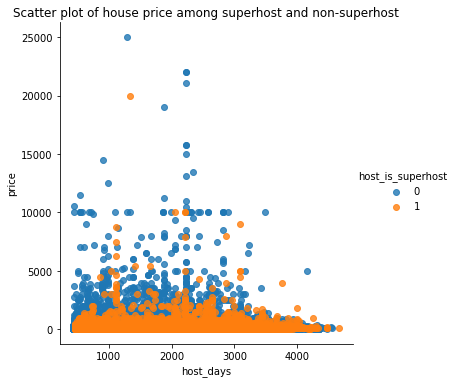

In [ ]:
sns.lmplot('host_days', 'price', data=df_host, hue='host_is_superhost', fit_reg=False).set(title = 'Scatter plot of house price among superhost and non-superhost')

In [ ]:
df_host.groupby('host_is_superhost').mean()['price']

host_is_superhost
0    232.778179
1    181.145612
Name: price, dtype: float64

1. non-superhost: skewed to the left, serveral outliers bring the average larger than superhost
2. superhost: distribution more concentrated
3. Further consideration: pull up those high-price houses and figure out what other factors lead to high prices

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


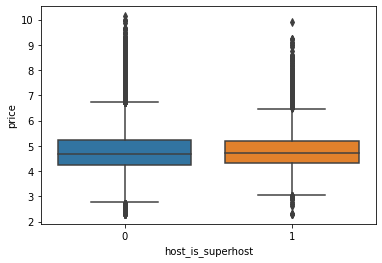

In [ ]:
from sklearn import preprocessing
sns.boxplot(df_host.host_is_superhost, np.log(df_host.price))

In [ ]:
df_host[['host_is_superhost','price']].groupby('host_is_superhost').describe()

price                          ...                       
                     count        mean         std  ...    50%    75%      max
host_is_superhost                                   ...                       
0                  30741.0  232.778179  671.027499  ...  109.0  190.0  25000.0
1                  13639.0  181.145612  386.317522  ...  110.0  180.0  20000.0

[2 rows x 8 columns]

non-superhost: skewed to the left, serveral outliers bring the average larger than superhost

Further consideration: pull up those high-price houses and figure out what other factors lead to high prices

**superhost vs non-superhost -- count distribution**

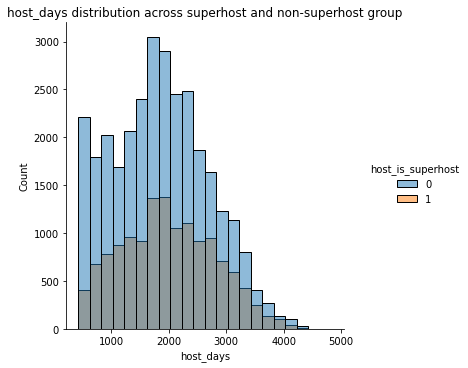

In [ ]:
ax = sns.displot(df_host, x="host_days", hue = 'host_is_superhost', binwidth=200).set(title='host_days distribution across superhost and non-superhost group')


Most host has been on Airbnb for more than 2000 days (6 years), distributions are similar between two groups, except there are overall less superhost than non-superhost.

**superhost vs non-superhost -- host description len**

In [ ]:
df_host[['host_is_superhost','host_about_len']].groupby('host_is_superhost').describe()

host_about_len                          ...                      
                           count        mean         std  ...    50%    75%     max
host_is_superhost                                         ...                      
0                        18382.0  304.687303  440.169603  ...  193.0  404.0  9081.0
1                        10093.0  386.667591  399.102457  ...  282.0  522.0  5250.0

[2 rows x 8 columns]

non-superhost tends to write longer description.

**superhost vs non-superhost -- host listing count**

In [ ]:
df_host.groupby('host_is_superhost').mean()['host_listings_count']

host_is_superhost
0    15.167829
1    29.293937
Name: host_listings_count, dtype: float64

superhost tends to have more listings than non-superhost

**superhost vs non-superhost -- verification**

In [ ]:
df_host.groupby('host_is_superhost').mean()['host_identity_verified']

host_is_superhost
0    0.440844
1    0.494024
Name: host_identity_verified, dtype: float64

Similar verification rate between two groups

### Property_type

In [ ]:

listings_Oct_2019.groupby('property_type').count().sort_values('id',ascending=False).head(5)
listings_Sep_2019.groupby('property_type').count().sort_values('id',ascending=False).head(5)
listings_Oct_2018.groupby('property_type').count().sort_values('id',ascending=False).head(5)

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,...,neighborhood_West Whittier-Los Nietos,neighborhood_Westchester,neighborhood_Westlake,neighborhood_Westlake Village,neighborhood_Westmont,neighborhood_Westwood,neighborhood_Whittier,neighborhood_Willowbrook,neighborhood_Wilmington,neighborhood_Windsor Square,neighborhood_Winnetka,neighborhood_Woodland Hills,host_days,host_about_len,24-hour check in,Air Conditioning,Accessibility,Alfresco,Baby-friendly,Balcony,Tech,BBQ,Beach,Sport,Kitchen Supplement,View,Pool,Free Parking,Parking Availability,Spa,Game,Wine,Garden,Children-friendly,Dryer,summary_scores,space_scores,description_scores,neighborhood_overview_scores,house_rules_scores
property_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apartment,16757,16757,16757,16755,16757,16757,16757,16757,16757,7476,9695,9927,9614,16757,16757,16748,16692,10487,16757,13950,16748,16748,16757,16757,16757,16757,16757,16757,16757,16745,16746,16737,150,16757,2101,1977,16757,14056,16757,16757,...,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16748,10487,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757,16757
House,14766,14766,14766,14763,14766,14766,14766,14766,14766,7362,8606,9381,8837,14766,14766,14755,14703,9681,14766,11628,14755,14755,14766,14766,14766,14766,14766,14766,14766,14749,14758,14748,122,14766,2225,1983,14766,12299,14766,14766,...,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14755,9681,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766,14766
Condominium,2284,2284,2284,2284,2284,2284,2284,2284,2284,1160,1285,1405,1408,2284,2284,2284,2278,1394,2284,1745,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,9,2284,231,237,2284,1902,2284,2284,...,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,1394,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
Guesthouse,2103,2103,2103,2103,2103,2103,2103,2103,2103,1348,1536,1606,1563,2103,2103,2102,2096,1473,2103,1792,2102,2102,2103,2103,2103,2103,2103,2103,2103,2103,2101,2103,31,2103,349,306,2103,1936,2103,2103,...,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2102,1473,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
Townhouse,1416,1416,1416,1415,1416,1416,1416,1416,1416,755,887,943,898,1416,1416,1414,1403,872,1416,1104,1414,1414,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,9,1416,145,139,1416,1251,1416,1416,...,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1414,872,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416


In [ ]:
listings_Oct_2019.loc[~listings_Oct_2019['property_type'].isin(['Condominium','House','Apartment','Guesthouse','Guest suite']), 'property_type'] = 'other'
listings_Sep_2019.loc[~listings_Sep_2019['property_type'].isin(['Condominium','House','Apartment','Guesthouse','Guest suite']), 'property_type'] = 'other'
listings_Oct_2018.loc[~listings_Oct_2019['property_type'].isin(['Condominium','House','Apartment','Guesthouse','Guest suite']), 'property_type'] = 'other'

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Boxplot of Prices for Different Property Types')]

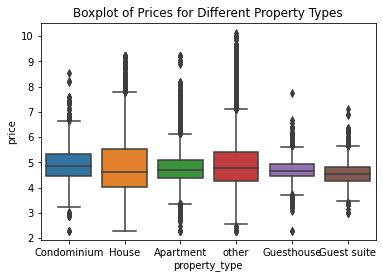

In [ ]:
sns.boxplot(df_property.property_type, np.log(df_property.price)).set(title = 'Boxplot of Prices for Different Property Types')

In [ ]:
listings_Oct_2019[listings_Oct_2019['price'] > 250].groupby('property_type',as_index=False).count().sort_values('id',ascending = False).head()

,property_type,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,neighborhood_West Whittier-Los Nietos,neighborhood_Westchester,neighborhood_Westlake,neighborhood_Westlake Village,neighborhood_Westmont,neighborhood_Westwood,neighborhood_Whittier,neighborhood_Willowbrook,neighborhood_Wilmington,neighborhood_Windsor Square,neighborhood_Winnetka,neighborhood_Woodland Hills,host_days,host_about_len,24-hour check in,Air Conditioning,Accessibility,Alfresco,Baby-friendly,Balcony,Tech,BBQ,Beach,Sport,Kitchen Supplement,View,Pool,Free Parking,Parking Availability,Spa,Game,Wine,Garden,Children-friendly,Dryer,summary_scores,space_scores,description_scores,neighborhood_overview_scores,house_rules_scores
4,House,3589,3589,3589,3589,3589,3589,3589,3589,3589,1764,1980,2013,2238,3589,3589,3587,3578,2253,3589,3089,3587,3587,3589,3589,3589,3589,3589,3589,3589,3588,3588,3586,32,3589,403,344,3589,3254,3589,...,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3587,2253,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589
5,other,1321,1321,1321,1321,1321,1321,1321,1321,1321,606,617,652,831,1321,1321,1321,1319,803,1321,1110,1321,1321,1321,1321,1321,1321,1321,1321,1321,1320,1321,1286,10,1321,89,82,1321,1088,1321,...,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,803,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
0,Apartment,1226,1226,1226,1226,1226,1226,1226,1226,1226,665,722,727,770,1226,1226,1225,1222,734,1226,1115,1225,1225,1226,1226,1226,1226,1226,1226,1226,1226,1225,1226,18,1226,69,91,1226,1045,1226,...,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1225,734,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
1,Condominium,466,466,466,466,466,466,466,466,466,269,226,224,339,466,466,466,465,285,466,328,466,466,466,466,466,466,466,466,466,466,466,466,2,466,35,33,466,420,466,...,466,466,466,466,466,466,466,466,466,466,466,466,466,285,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466
3,Guesthouse,64,64,64,64,64,64,64,64,64,42,44,53,48,64,64,64,64,43,64,52,64,64,64,64,64,64,64,64,64,64,64,64,1,64,7,4,64,62,64,...,64,64,64,64,64,64,64,64,64,64,64,64,64,43,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


In [ ]:
listings_Oct_2019.groupby('property_type',as_index=False).count().sort_values('id',ascending = False).head()

,property_type,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,neighborhood_West Whittier-Los Nietos,neighborhood_Westchester,neighborhood_Westlake,neighborhood_Westlake Village,neighborhood_Westmont,neighborhood_Westwood,neighborhood_Whittier,neighborhood_Willowbrook,neighborhood_Wilmington,neighborhood_Windsor Square,neighborhood_Winnetka,neighborhood_Woodland Hills,host_days,host_about_len,24-hour check in,Air Conditioning,Accessibility,Alfresco,Baby-friendly,Balcony,Tech,BBQ,Beach,Sport,Kitchen Supplement,View,Pool,Free Parking,Parking Availability,Spa,Game,Wine,Garden,Children-friendly,Dryer,summary_scores,space_scores,description_scores,neighborhood_overview_scores,house_rules_scores
0,Apartment,16120,16120,16120,16118,16120,16120,16120,16120,16120,7211,9362,8809,9573,16120,16120,16110,16068,10083,16120,13891,16110,16110,16120,16120,16120,16120,16120,16120,16120,16113,16081,16109,121,16120,1577,1490,16120,13886,16120,...,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16110,10083,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120,16120
4,House,15317,15317,15317,15316,15317,15317,15317,15317,15317,7787,9301,9281,9864,15317,15317,15298,15258,9937,15317,12408,15298,15298,15317,15317,15317,15317,15317,15317,15317,15307,15305,15300,106,15317,1735,1541,15317,13170,15317,...,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15298,9937,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317,15317
5,other,6428,6428,6428,6426,6428,6428,6428,6428,6428,3315,3883,3804,4185,6428,6428,6424,6402,4192,6428,5211,6424,6424,6428,6428,6428,6428,6428,6428,6428,6426,6423,6391,36,6428,573,539,6428,5543,6428,...,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6424,4192,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428,6428
1,Condominium,2595,2595,2595,2594,2595,2595,2595,2595,2595,1308,1561,1528,1740,2595,2595,2593,2587,1542,2595,2052,2593,2593,2595,2595,2595,2595,2595,2595,2595,2595,2594,2593,9,2595,204,211,2595,2285,2595,...,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2593,1542,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595,2595
3,Guesthouse,2356,2356,2356,2356,2356,2356,2356,2356,2356,1477,1805,1717,1843,2356,2356,2350,2345,1626,2356,2037,2350,2350,2356,2356,2356,2356,2356,2356,2356,2356,2353,2355,26,2356,289,256,2356,2214,2356,...,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2350,1626,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356


1. House prices have largerst variance, Guesthouse prices have least variance
2. Most common to least common: Apartment > House > Other  > Guest house > Guest suite 
3. Average price from higest to lowest: Other (Villa, Townhouse) > House > Condominium > Apartment > Guest house > Guest suite 

### Amenities

In [ ]:
features = df_amenities.loc[:,'24-hour check in': 'Dryer'].columns
for a in features:
  print(df_amenities[[a, 'price']].groupby(a).describe())

                    price                          ...                       
                    count        mean         std  ...    50%    75%      max
24-hour check in                                   ...                       
0.0               40087.0  218.806995  619.993586  ...  108.0  185.0  25000.0
1.0                4293.0  199.199394  338.521784  ...  125.0  205.0  10000.0

[2 rows x 8 columns]
                    price                          ...                       
                    count        mean         std  ...    50%    75%      max
Air Conditioning                                   ...                       
0.0               10350.0  178.429469  524.395714  ...   99.0  162.0  20000.0
1.0               34030.0  228.613988  618.943676  ...  115.0  195.0  25000.0

[2 rows x 8 columns]
                 price                          ...                       
                 count        mean         std  ...    50%    75%      max
Accessibility             


1. Baby-friendly (Baby bath,Baby equipment,Baby monitor, Babysitter recommendations), bring average price from 213.70 to 310.98
2. Balcony (whether the place has balcony or not), bring average price from 196.48 to 272.95
3. BBQ (whether BBQ is available or not), bring average price from 192.77 to 354.75
4. Beach accessibility, bring average from 207.60 to 363.45
5. Smart Home (Amazon echo, Apple TV), bring average price from 209.16 to 820.46
6. View accessibility, bring average price from 215.60 to 364.78
7. Pool availability, bring average price from 164.04 to 399.54
8. Spa, bring average price from 216.34 to 4455.83 (but only 6 places provide this service)
9. Wine, bring average price from 209.11 to 3046.18 (but only small proportion of places provide this)
10. Game, bring average price from 213.48 to 459.54 

### Review Sentiment

In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''

#Unify type of comment
comments = list(map(str, review_Oct_2019['comments']))
df = pd.DataFrame()


for i in range(300):
  #Raw
  tokenized_raw = " ".join(nltk.regexp_tokenize(comments[i], pattern))
  tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

  # Remove punctuations
  nopunct = []
  for sent in tokenized_raw:
      a = [w for w in sent.split() if w not in string.punctuation]
      nopunct.append(" ".join(a))

  #Tokenize
  tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]

  # Create a list of unique words 
  unique_words = list(set([item for sublist in tok_corp for item in sublist]))

  #Remove stopword, characters, and unrecognized words
  swords = stopwords.words('english')
  swords = [word for word in swords if ('\'' not in word) and ('n\'' not in word)]
  swords.append('the')
  swords.append('The')
  unique_words = [word for word in unique_words if (word not in swords) and (len(word) > 1)]
  unique_words = [word for word in unique_words if word in model.vocab]
  if len(unique_words) > 1:
    #Generate vector list
    vector_list = model[unique_words]
  
    my_data_embed=TSNE(n_components=2, perplexity=50, method='barnes_hut').fit_transform(vector_list)
    #plot for my embedding
    x_axis= my_data_embed[:,0]
    y_axis=my_data_embed[:,1]

    temp = pd.DataFrame(my_data_embed)
    temp['word'] = unique_words
    temp['comment'] = i

    df = pd.concat([df, temp], ignore_index=True)
    if i % 100 == 0:
      print(i, ' done')
df = df.rename(columns={0: 'x', 1: 'y'})
df

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='x', y='y', hue='comment')

In [ ]:
def sentiment_scores(sentence):
  sid_obj = SentimentIntensityAnalyzer() 
  sentiment_dict = sid_obj.polarity_scores(sentence) 
  #print("Overall sentiment dictionary is : ", sentiment_dict)
  return sentiment_dict.get('compound')


In [ ]:
review_Oct_2019['date'] = pd.to_datetime(review_Oct_2019['date'])
temp1 = review_Oct_2019[(review_Oct_2019['date'].dt.month == 9) & (review_Oct_2019['date'].dt.year == 2019)]
temp2 = review_Oct_2019[(review_Oct_2019['date'].dt.month == 10) & (review_Oct_2019['date'].dt.year == 2018)]
sample = pd.concat([temp1, temp2], ignore_index=True).sample(5000)
sample

,listing_id,id,date,reviewer_id,reviewer_name,comments
22484,19810651,538445447,2019-09-29,190919831,장희,차가 있으면 위치가 좋지만 우버를 타고 다니긴 힘들꺼 같아요. 다른 세탁 건조기 에...
36816,27267447,536030262,2019-09-25,296213421,Plug,Great host. Spacious luxurious design concept ...
55498,35658455,532422395,2019-09-19,87175342,Julie,Winnie was really accommodating about letting ...
90615,22045193,332586946,2018-10-05,138126805,Sören,"We had a great stay, very clean, tidy, lovely ..."
1241,756777,526962728,2019-09-09,262988472,Yuepon,"Great host, kind, responsive and great room as..."
...,...,...,...,...,...,...
52047,34202377,526946426,2019-09-09,18137060,Sean M.,"Five star stay! Clean, great communication, an..."
2786,1885962,522990552,2019-09-02,33838695,Mahmoud,Cela fait 2 années consécutives que je loue l’...
41095,29342242,533529736,2019-09-21,147945136,Maria,Great location. Great communication. Home wa...
92189,22732906,336722368,2018-10-14,8538709,Steve,This house is clean and well-kept and very att...


In [ ]:
comments = list(map(str, sample['comments']))
polarities = [sentiment_scores(comment) for comment in comments]
sample['polarities'] = polarities
sample

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarities
22484,19810651,538445447,2019-09-29,190919831,장희,차가 있으면 위치가 좋지만 우버를 타고 다니긴 힘들꺼 같아요. 다른 세탁 건조기 에...,0.0000
36816,27267447,536030262,2019-09-25,296213421,Plug,Great host. Spacious luxurious design concept ...,0.8481
55498,35658455,532422395,2019-09-19,87175342,Julie,Winnie was really accommodating about letting ...,0.8290
90615,22045193,332586946,2018-10-05,138126805,Sören,"We had a great stay, very clean, tidy, lovely ...",0.9756
1241,756777,526962728,2019-09-09,262988472,Yuepon,"Great host, kind, responsive and great room as...",0.9451
...,...,...,...,...,...,...,...
52047,34202377,526946426,2019-09-09,18137060,Sean M.,"Five star stay! Clean, great communication, an...",0.9214
2786,1885962,522990552,2019-09-02,33838695,Mahmoud,Cela fait 2 années consécutives que je loue l’...,-0.2500
41095,29342242,533529736,2019-09-21,147945136,Maria,Great location. Great communication. Home wa...,0.9323
92189,22732906,336722368,2018-10-14,8538709,Steve,This house is clean and well-kept and very att...,0.8749


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

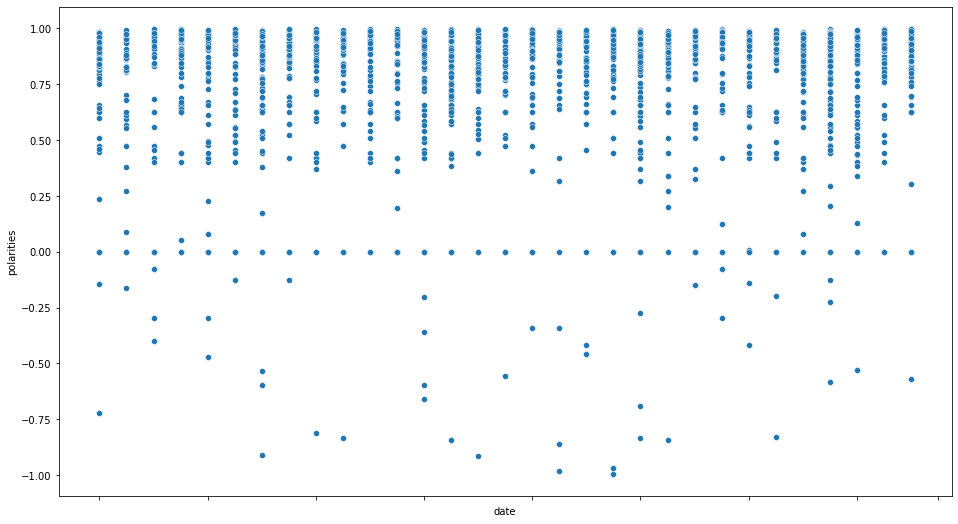

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=sample[sample['date'].dt.month == 10], x='date', y='polarities')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

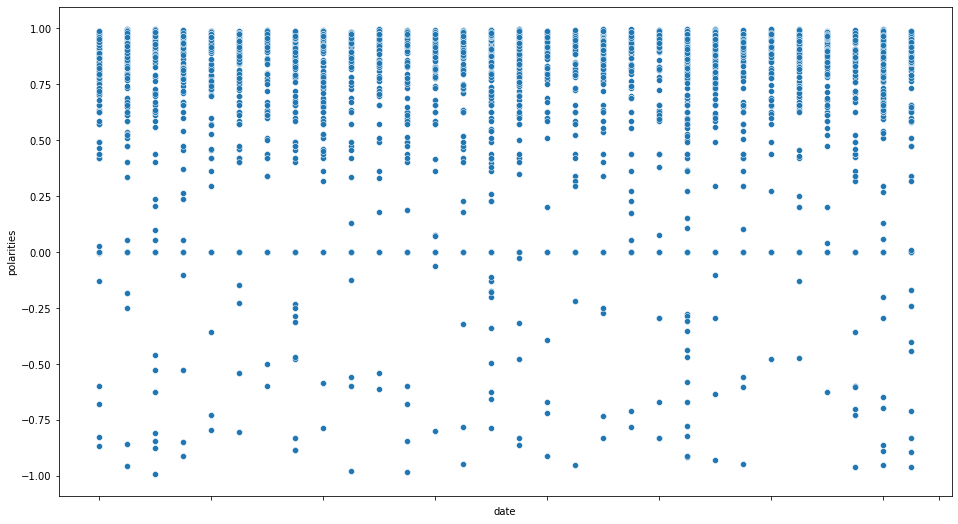

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=sample[sample['date'].dt.month == 9], x='date', y='polarities')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
review_Sep_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-09-14/data/reviews.csv.gz', compression='gzip')
listings_Sep_2019 = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2019-09-14/data/listings.csv.gz', compression='gzip')
display(review_Sep_2019.head())
display(listings_Sep_2019.head())
print(review_Oct_2019.shape)
print(listings_Oct_2019.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20190914032935,2019-09-14,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,30,730,30,30,730,730,30.0,730.0,7 months ago,t,0,0,0,165,2019-09-14,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20190914032935,2019-09-14,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,50%,NaN,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,7 weeks ago,t,0,0,0,0,2019-09-14,6,1,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.15
2,2708,https://www.airbnb.com/rooms/2708,20190914032935,2019-09-14,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendt

(1511391, 6)
(44380, 383)


# Model Selection and Comparison

In [ ]:
sample_merge=sample[['listing_id','polarities']]
X=listings_Oct_2019.merge(sample_merge,left_on='id',right_on='listing_id',how='inner')
X.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'Garden', 'Children-friendly', 'Dryer', 'summary_scores',
       'space_scores', 'description_scores', 'neighborhood_overview_scores',
       'house_rules_scores', 'listing_id', 'polarities'],
      dtype='object', length=385)

In [ ]:
X = pd.concat([listings_Sep_2019, listings_Oct_2018], ignore_index=True).drop(['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'weekly_price', 'monthly_price', 'square_feet', 'id', 'scrape_id', 'host_id', 'license'], axis = 1)
y = X["price"]
X = X.drop("price", axis = 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_train.head()

In [ ]:
def drop_all_non_numeric_col(df):
    drop_col = []
    df = df.reset_index().drop('index', axis = 1)
    for c in df.columns:
        if (type(df[c][0]) == str) or (type(df[c][1]) == str) or ((type(df[c][2]) == str)) or (type(df[c][3]) == str):
            drop_col.append(c)
    df = df.drop(drop_col, axis = 1)
    return df

x_train_DT = drop_all_non_numeric_col(x_train)
x_test_DT = drop_all_non_numeric_col(x_test)

for c in x_train_DT.columns:
    x_train_DT[c].fillna((x_train_DT[c].mean()), inplace=True)
    x_test_DT[c].fillna((x_test_DT[c].mean()), inplace=True)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(7, 23), max_iter=10000, 
                    solver='lbfgs', verbose=1)
clf = clf.fit(x_train_DT, y_train)
y_pred_train = clf.predict(x_train_DT)
y_pred_test = clf.predict(x_test_DT)
print('Standard Deviation on training set using neural network: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))
print('Standard Deviation on test set using neural network: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf = clf.fit(x_train_DT, y_train)
y_pred_train = clf.predict(x_train_DT)
y_pred_test = clf.predict(x_test_DT)
print('Accuracy on training set using SVC: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))
print('Accuracy on test set using SVC: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print('The MSE for training set is ' + str(mean_squared_error(np.array(s_y_train), clf.predict(s_X_train))**(0.5)))
print('The MSE for test set is ' + str(mean_squared_error(np.array(s_y_test), clf.predict(s_X_test))**(0.5)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=36)
clf = clf.fit(x_train_DT, y_train)
y_pred_train = clf.predict(x_train_DT)
y_pred_test = clf.predict(x_test_DT)
print('Standard Deviation on training set using decision tree: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))
print('Standard Deviation on test set using decision tree: {}'.format(np.sqrt(np.sum((y_test - y_pred_test) ** 2) / len(y_train))))

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf = clf.fit(x_train_DT, y_train)
y_pred_train = clf.predict(x_train_DT)
y_pred_test = clf.predict(x_test_DT)
print('Standard Deviation on training set using logistic regression: {}'.format(np.sqrt(np.sum((y_train - y_pred_train) ** 2) / len(y_train))))
print('Standard Deviation on test set using logistic regression: {}'.format(np.sqrt(np.sum((y_test - y_pred_test) ** 2) / len(y_train))))

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', train_accuracy)